---- KNN Classification on IRIS Dataset ----
Accuracy Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



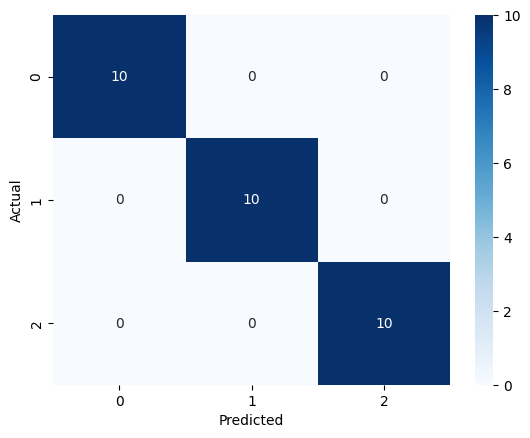


---- KNN Classification on DIABETES Dataset ----
Accuracy Score: 0.7078
Confusion Matrix:
[[80 20]
 [25 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



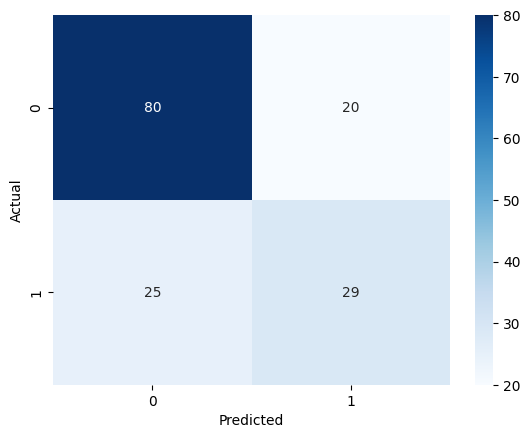

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to evaluate the model
def evaluate_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print(f"Accuracy Score: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)

    # Confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ----------------------- Part 1: IRIS Dataset -----------------------
print("---- KNN Classification on IRIS Dataset ----")

# Load IRIS dataset
iris_df = pd.read_csv("/iris.csv")

# Assuming last column is the target
X_iris = iris_df.iloc[:, :-1]
y_iris = iris_df.iloc[:, -1]

# Train-test split (80-20)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

# Try different k values to choose optimal one (optional)
k_iris = 3  # You can optimize this using a loop

# Train KNN model
knn_iris = KNeighborsClassifier(n_neighbors=k_iris)
knn_iris.fit(X_train_iris, y_train_iris)

# Predict
y_pred_iris = knn_iris.predict(X_test_iris)

# Evaluate
evaluate_model(y_test_iris, y_pred_iris)

# ----------------------- Part 2: Diabetes Dataset -----------------------
print("\n---- KNN Classification on DIABETES Dataset ----")

# Load diabetes dataset
diabetes_df = pd.read_csv("/diabetes.csv")

# Assuming last column is the target
X_diabetes = diabetes_df.iloc[:, :-1]
y_diabetes = diabetes_df.iloc[:, -1]

# Feature scaling
scaler = StandardScaler()
X_scaled_diabetes = scaler.fit_transform(X_diabetes)

# Train-test split (80-20)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(
    X_scaled_diabetes, y_diabetes, test_size=0.2, random_state=42, stratify=y_diabetes
)

# Choose k value
k_diabetes = 5  # Again, can be optimized

# Train KNN model
knn_diabetes = KNeighborsClassifier(n_neighbors=k_diabetes)
knn_diabetes.fit(X_train_dia, y_train_dia)

# Predict
y_pred_dia = knn_diabetes.predict(X_test_dia)

# Evaluate
evaluate_model(y_test_dia, y_pred_dia)


Best K: 12 with Accuracy: 0.8689


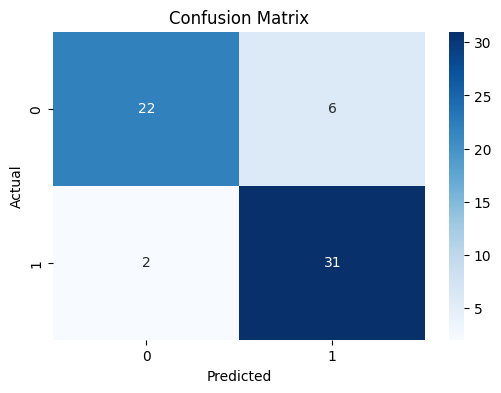

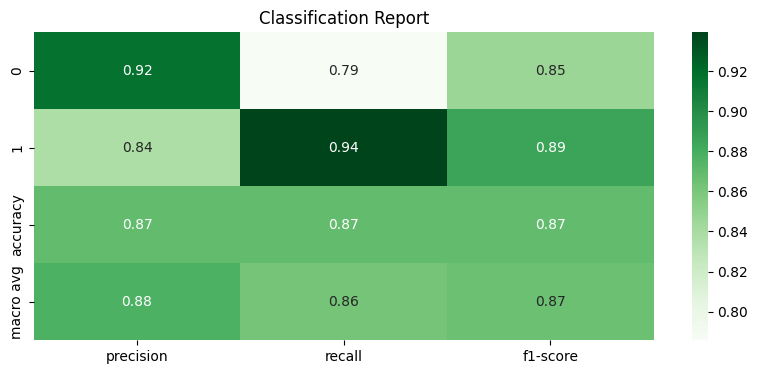

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load heart dataset
df = pd.read_csv("/heart.csv")

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Find the best K
accuracy_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Best K value
best_k = k_range[np.argmax(accuracy_scores)]
print(f"Best K: {best_k} with Accuracy: {max(accuracy_scores):.4f}")

# Train model with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot classification report as heatmap
report = classification_report(y_test, y_pred_best, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Greens')
plt.title("Classification Report")
plt.show()
